#Importing Dependencies

In [ ]:
!pip install -U transformers tensorflow tf-keras tensorflow_addons contractions emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import gdown
import contractions
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import gc
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from transformers import AdamWeightDecay, TFBertModel, BertConfig, BertTokenizer ,InputExample, InputFeatures ,TFBertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,ModelCheckpoint
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision, Recall
from google.colab import files
import warnings
import time
import os
from datetime import datetime
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Bidirectional, Attention,
                                     GlobalAveragePooling1D, Embedding ,BatchNormalization ,SpatialDropout1D,
                                     Reshape, Activation, GlobalMaxPooling1D, Concatenate)

In [ ]:
# Ensure punkt is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.19.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heshamalsaadi","key":"3668e4ef1bf41df07b27db2cec059f92"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Loading Datasets

##Twitter Sentiment Dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.60M [00:00<?, ?B/s]
100% 7.60M/7.60M [00:00<00:00, 780MB/s]


In [ ]:
!unzip twitter-sentiment-dataset.zip

Archive:  twitter-sentiment-dataset.zip
  inflating: Twitter_Data.csv        


In [ ]:
import os
# List of files to delete
files_to_delete = ['twitter-sentiment-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-sentiment-dataset.zip


In [ ]:
file_path = '/content/Twitter_Data.csv'
df_Twitter_Data = pd.read_csv(file_path)
df_Twitter_Data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_Twitter_Data.rename(columns={'clean_text': 'text'}, inplace=True)
df_Twitter_Data.rename(columns={'category': 'sentiment'}, inplace=True)
df_Twitter_Data

,text,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       162976 non-null  object 
 1   sentiment  162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


##Reddit Sentimental analysis Dataset

In [ ]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/10.0M [00:00<?, ?B/s]
100% 10.0M/10.0M [00:00<00:00, 446MB/s]


In [ ]:
!unzip twitter-and-reddit-sentimental-analysis-dataset.zip
#Answer (n)

Archive:  twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
replace Twitter_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# List of files to delete
files_to_delete = ['twitter-and-reddit-sentimental-analysis-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-and-reddit-sentimental-analysis-dataset.zip


In [ ]:
file_path = '/content/Reddit_Data.csv'
df_Reddit_Data = pd.read_csv(file_path)
df_Reddit_Data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df_Reddit_Data.rename(columns={'clean_comment': 'text'}, inplace=True)
df_Reddit_Data.rename(columns={'category': 'sentiment'}, inplace=True)
df_Reddit_Data

,text,sentiment
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df_Reddit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       37149 non-null  object
 1   sentiment  37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


##Twitter Sentiment Analysis Dataset

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 231MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
# List of files to delete
files_to_delete = ['twitter-entity-sentiment-analysis.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-entity-sentiment-analysis.zip


In [ ]:
file_path = '/content/twitter_training.csv'
df_twitter_training = pd.read_csv(file_path)
print(df_twitter_training.columns)
df_twitter_training

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
file_path = '/content/twitter_validation.csv'
df_twitter_validation = pd.read_csv(file_path)
print(df_twitter_validation.columns)
df_twitter_validation

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Remove column names (reset to default numeric index)
df_twitter_training.columns = range(df_twitter_training.shape[1])  # Reset column names to 0, 1, 2, ...
df_twitter_validation.columns = range(df_twitter_validation.shape[1])  # Reset column names to 0, 1, 2, ...

In [ ]:
# Combine the DataFrames
combined_df = pd.concat([df_twitter_training, df_twitter_validation], ignore_index=True)

# Add meaningful column names
combined_df.columns = ['id', 'ni', 'rate', 'text']

print("Combined DataFrame with meaningful column names:")
combined_df

Combined DataFrame with meaningful column names:


,id,ni,rate,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Irrelevant': 0
}
combined_df['sentiment'] = combined_df['rate'].map(sentiment_mapping)
combined_df = combined_df.drop(['ni', 'id', 'rate'], axis=1)
combined_df

,text,sentiment
0,I am coming to the borders and I will kill you...,1
1,im getting on borderlands and i will kill you ...,1
2,im coming on borderlands and i will murder you...,1
3,im getting on borderlands 2 and i will murder ...,1
4,im getting into borderlands and i can murder y...,1
...,...,...
75675,⭐️ Toronto is the arts and culture capital of ...,0
75676,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,0
75677,Today sucked so it’s time to drink wine n play...,1
75678,Bought a fraction of Microsoft today. Small wins.,1


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       74994 non-null  object
 1   sentiment  75680 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


#Dataset Preprocessing

In [ ]:
'''
df_combined_twitter_filtered
df_emotions_filtered
df_Reddit_Data_filtered
df_Twitter_Data_filtered
df_IMDB_filtered
df_Sentiment140_dataset
'''
all_data_df = pd.concat([df_Twitter_Data, df_Reddit_Data], ignore_index=True)
all_data_df_shuffled = all_data_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_data_df_shuffled

,text,sentiment
0,another years bjp modi and hindu nationalism w...,1.0
1,bjp are giving priority development narendra m...,0.0
2,its known fact that missionaries are funding f...,1.0
3,india has attained antisatellite capability be...,1.0
4,dont ask modi apple pass kiya hai ask that duf...,0.0
...,...,...
200224,how tragic that you are delighted this serious...,-1.0
200225,wuld like read modi interview swarajya magazine,0.0
200226,hurt telugu pride our leader has been humiliat...,-1.0
200227,fan fully support conversion cause but modi go...,-1.0


In [ ]:
all_data_df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       200125 non-null  object 
 1   sentiment  200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
# Check current class distribution
original_distribution = all_data_df_shuffled['sentiment'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_distribution)

Original Class Distribution:
sentiment
 1.0    0.439912
 0.0    0.341396
-1.0    0.218692
Name: proportion, dtype: float64


In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['text'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 104


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['text'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['text'].isnull().sum()}")

Number of null values after dropping: 0


In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['sentiment'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 7


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['sentiment'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['sentiment'].isnull().sum()}")

Number of null values after dropping: 0


Text(0.5, 1.0, 'target Data Distribution')

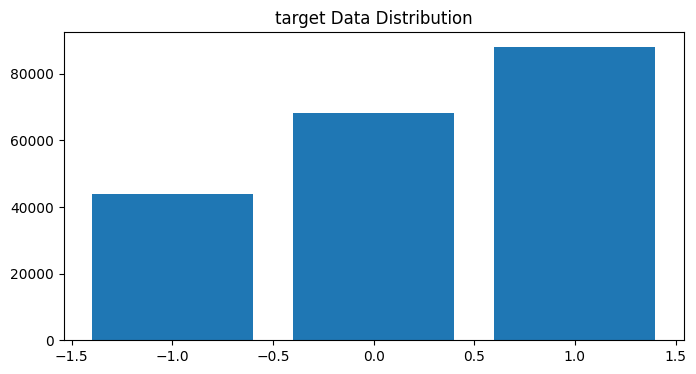

In [ ]:
val_count = all_data_df_shuffled.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("target Data Distribution")

#Model Training

## optimized_lstm_model.py

In [ ]:
from google.colab import files

# Save to CSV
all_data_df_shuffled.to_csv('all_data_shuffled.csv', index=False)

GPU is available
Starting Simplified LSTM Model Training - simplified_lstm_20250612-172438
Label mapping: {'-1.0': 0, '0.0': 1, '1.0': 2}
Number of classes: 3

Class distribution:
sentiment
 1.0    0.440135
 0.0    0.341064
-1.0    0.218801
Name: proportion, dtype: float64

Training set size: 140082
Validation set size: 40024
Testing set size: 20012

Preprocessing text data...
Preprocessing completed in 54.92 seconds

Tokenizing and padding sequences...

Class weights: {2: 1.0, 1: 1.2904780742238435, 0: 2.0115790435298955}
Vocabulary size: 50000


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 200)   │ 10,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 50, 200)   │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 50)        │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50, 128)   │    135,680 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_attention    │ (None, 128)       │        128 │ bidirectional[0]… │
│ (SimpleAttention)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ bidirectional[0]… │
│ (GlobalAveragePool… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ simple_attention… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     12,320 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32)        │        128 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32)        │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │         99 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,148,355 (38.71 MB)

 Trainable params: 10,148,291 (38.71 MB)

 Non-trainable params: 64 (256.00 B)


Training model...
Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.7425 - loss: 0.7604
Epoch 1: val_accuracy improved from -inf to 0.95328, saving model to models/simplified_lstm_20250612-172438_best.h5


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 475s 423ms/step - accuracy: 0.7426 - loss: 0.7602 - val_accuracy: 0.9533 - val_loss: 0.1362 - learning_rate: 5.0000e-04
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9578 - loss: 0.1733
Epoch 2: val_accuracy improved from 0.95328 to 0.95953, saving model to models/simplified_lstm_20250612-172438_best.h5


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 494s 419ms/step - accuracy: 0.9578 - loss: 0.1733 - val_accuracy: 0.9595 - val_loss: 0.1164 - learning_rate: 5.0000e-04
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.9712 - loss: 0.1091
Epoch 3: val_accuracy improved from 0.95953 to 0.95978, saving model to models/simplified_lstm_20250612-172438_best.h5


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 500s 418ms/step - accuracy: 0.9712 - loss: 0.1091 - val_accuracy: 0.9598 - val_loss: 0.1222 - learning_rate: 5.0000e-04
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9794 - loss: 0.0730
Epoch 4: val_accuracy did not improve from 0.95978

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 454s 415ms/step - accuracy: 0.9794 - loss: 0.0729 - val_accuracy: 0.9595 - val_loss: 0.1325 - learning_rate: 5.0000e-04
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9868 - loss: 0.0451
Epoch 5: val_accuracy did not improve from 0.95978
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 455s 416ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9597 - val_loss: 0.1478 - learning_rate: 2.5000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.



Training completed in 2378.19 seconds (39.64 minutes)
Model saved to models/simplified_lstm_20250612-172438_final.h5

Evaluating model on test data...
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step

Test Accuracy: 0.9608
Weighted Precision: 0.9611
Weighted Recall: 0.9608
Weighted F1 Score: 0.9607

Classification Report:
              precision    recall  f1-score   support

        -1.0     0.9459    0.9061    0.9256      4379
         0.0     0.9914    0.9778    0.9845      6808
         1.0     0.9452    0.9749    0.9598      8808

    accuracy                         0.9608     19995
   macro avg     0.9608    0.9530    0.9567     19995
weighted avg     0.9611    0.9608    0.9607     19995

Confusion matrix saved to plots/confusion_matrix.png
ROC curves saved to plots/roc_curves.png
Training history plot saved to plots/training_history.png

Model training and evaluation complete!
Final test accuracy: 0.9608
Final weighted F1 score: 0.9607


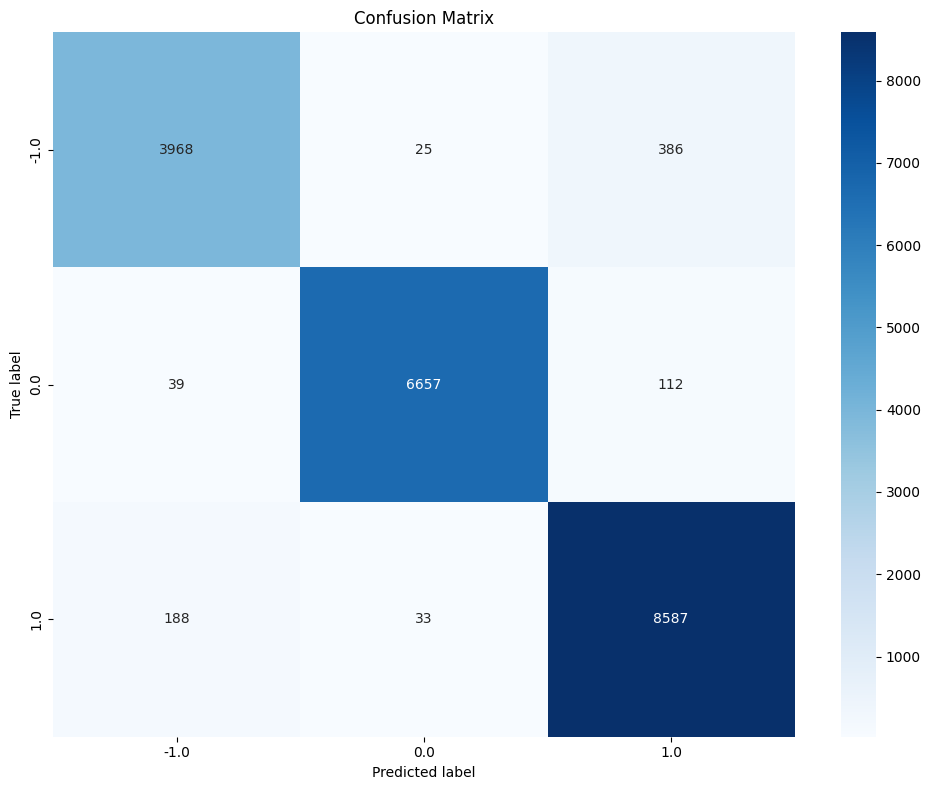

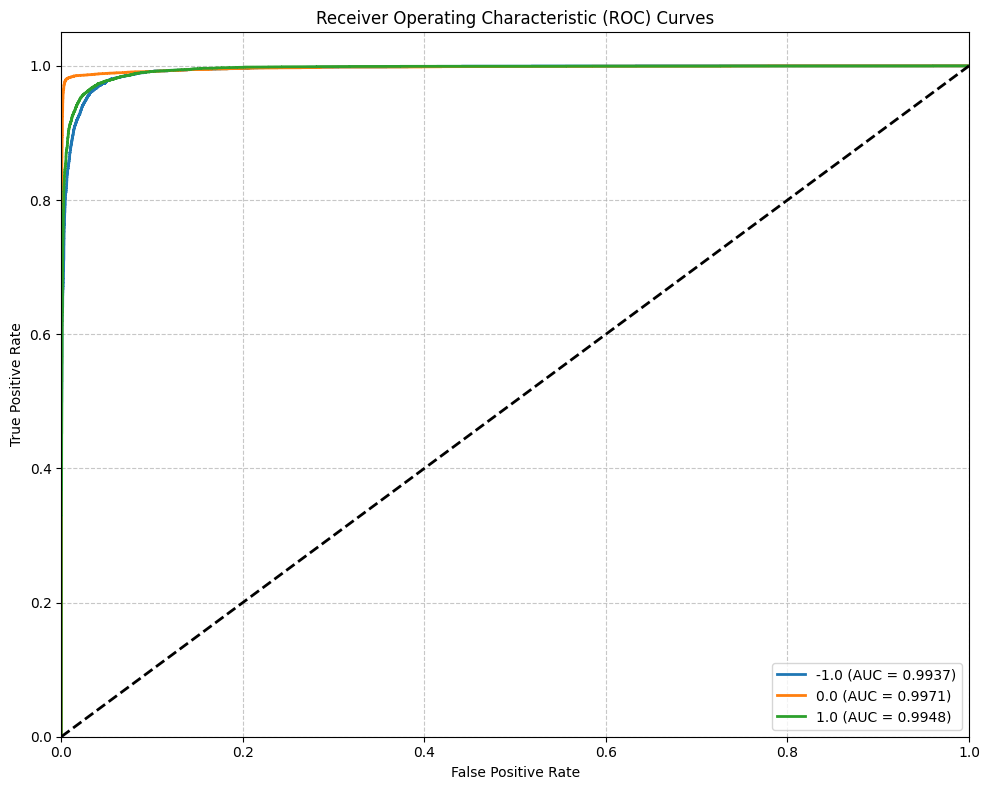

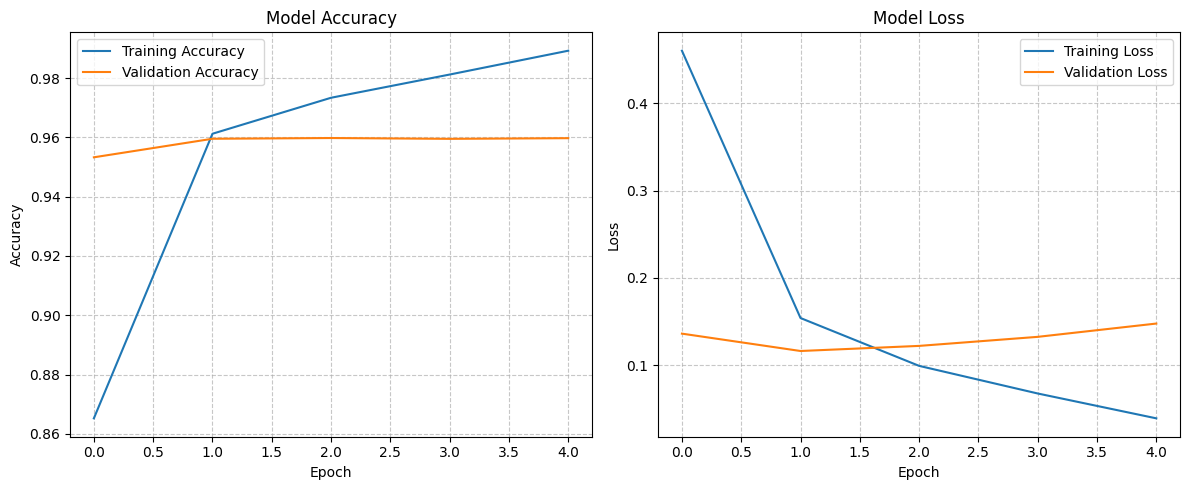

In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Download required NLTK resources
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Check for GPU availability
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Configuration parameters - simplified for better stability
MAX_FEATURES = 50000   # Maximum number of words in vocabulary
MAX_LENGTH = 50        # Maximum sequence length
EMBEDDING_DIM = 200    # Embedding dimension
BATCH_SIZE = 128       # Batch size - increased for better stability
EPOCHS = 10            # Maximum number of epochs
VALIDATION_SPLIT = 0.2 # Validation split ratio
TEST_SPLIT = 0.1       # Test split ratio
LEARNING_RATE = 5e-4   # Initial learning rate - adjusted for stability
DROPOUT_RATE = 0.2     # Dropout rate - reduced to prevent underfitting
LSTM_UNITS = 64        # LSTM units - simplified
DENSE_UNITS = 32       # Dense layer units - simplified
REMOVE_STOPWORDS = False # Whether to remove stopwords

# Create a timestamp for model versioning
TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")
MODEL_NAME = f"simplified_lstm_{TIMESTAMP}"

# Create directories for model artifacts
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

#------------------------------------------------------------------------------
# Simplified Preprocessing Functions
#------------------------------------------------------------------------------

def preprocess_for_lstm(text, remove_stopwords=REMOVE_STOPWORDS):

    if not isinstance(text, str) or pd.isna(text) or text.strip() == '':
        return ""

    try:
        # Initialize stopwords if needed
        stop_words = set(stopwords.words('english')) if remove_stopwords else set()
        # Keep negation words even when removing stopwords
        negation_words = {'no', 'not', 'nor', 'neither', 'never', 'none'}
        stop_words = stop_words - negation_words

        # Convert emojis to text
        text = emoji.demojize(text)

        # Expand contractions
        text = contractions.fix(text)

        # Replace URLs and mentions with placeholders
        text = re.sub(r'https?://\S+|www\.\S+', ' URL ', text)
        text = re.sub(r'@\S+', ' USER ', text)

        # Replace multiple spaces with single space
        text = re.sub(r'\s+', ' ', text)

        # Convert to lowercase
        text = text.lower()

        # Preserve emoticons
        emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

        # Remove special characters but preserve important punctuation
        text = re.sub(r'[^\w\s!?.,]', ' ', text)

        # Tokenize
        tokens = word_tokenize(text)

        # Process tokens
        processed_tokens = []
        for token in tokens:
            # Skip empty tokens
            if not token.strip():
                continue

            # Skip stopwords if enabled
            if token in stop_words:
                continue

            # No stemming or lemmatization - preserve original form
            processed_tokens.append(token)

        # Add emoticons back
        processed_tokens.extend(emoticons)

        # Join tokens back into text
        processed_text = ' '.join(processed_tokens)

        # Final cleanup of multiple spaces
        processed_text = re.sub(r'\s+', ' ', processed_text).strip()

        return processed_text

    except Exception as e:
        print(f"Error preprocessing text: '{text[:50]}...'")
        print(f"Error: {str(e)}")
        return ""

#------------------------------------------------------------------------------
# Data Loading and Preparation
#------------------------------------------------------------------------------

def load_and_prepare_data(csv_path=None, df=None, text_column='text', sentiment_column='sentiment'):

    # Load data
    if df is not None:
        all_data = df.copy()
    elif csv_path:
        try:
            all_data = pd.read_csv(csv_path)
        except Exception as e:
            print(f"Error loading CSV file: {str(e)}")
            print("Using sample data instead...")
            # Create sample data
            all_data = pd.DataFrame({
                text_column: [
                    "I love this product, it's amazing!",
                    "This is terrible, I hate it.",
                    "It's okay, nothing special.",
                    "Best purchase ever, highly recommend!",
                    "Worst experience of my life, avoid at all costs.",
                    "Neutral opinion, could be better or worse."
                ],
                sentiment_column: [
                    "Positive", "Negative", "neutral",
                    "Positive", "Negative", "neutral"
                ]
            })
    else:
        raise ValueError("Either df or csv_path must be provided")

    # Check if columns exist
    if text_column not in all_data.columns:
        raise ValueError(f"Text column '{text_column}' not found in DataFrame. Available columns: {all_data.columns.tolist()}")

    if sentiment_column not in all_data.columns:
        raise ValueError(f"Sentiment column '{sentiment_column}' not found in DataFrame. Available columns: {all_data.columns.tolist()}")

    # Drop rows with missing values
    all_data = all_data.dropna(subset=[text_column, sentiment_column])

    # Create label mapping
    # Filter out invalid labels
    valid_labels = [-1.0, 0.0, 1.0]
    all_data = all_data[all_data[sentiment_column].isin(valid_labels)]

    # Create label mapping with string keys
    unique_labels = sorted(all_data[sentiment_column].unique())
    label_mapping = {str(label): i for i, label in enumerate(unique_labels)}
    num_classes = len(label_mapping)

    print(f"Label mapping: {label_mapping}")
    print(f"Number of classes: {num_classes}")

    # Apply label mapping
    # Apply label mapping with string conversion
    all_data['label_numeric'] = all_data[sentiment_column].astype(str).map(label_mapping)

    # Check class distribution
    print("\nClass distribution:")
    class_distribution = all_data[sentiment_column].value_counts(normalize=True)
    print(class_distribution)

    # Split data
    train_df, temp_df = train_test_split(all_data, test_size=VALIDATION_SPLIT + TEST_SPLIT, random_state=SEED, stratify=all_data[sentiment_column])
    val_df, test_df = train_test_split(temp_df, test_size=TEST_SPLIT/(VALIDATION_SPLIT + TEST_SPLIT), random_state=SEED, stratify=temp_df[sentiment_column])

    print(f"\nTraining set size: {len(train_df)}")
    print(f"Validation set size: {len(val_df)}")
    print(f"Testing set size: {len(test_df)}")

    # Preprocess text
    print("\nPreprocessing text data...")
    start_time = time.time()

    train_df['processed_text'] = train_df[text_column].apply(preprocess_for_lstm)
    val_df['processed_text'] = val_df[text_column].apply(preprocess_for_lstm)
    test_df['processed_text'] = test_df[text_column].apply(preprocess_for_lstm)

    print(f"Preprocessing completed in {time.time() - start_time:.2f} seconds")

    # Remove empty processed texts
    train_df = train_df[train_df['processed_text'].str.len() > 0]
    val_df = val_df[val_df['processed_text'].str.len() > 0]
    test_df = test_df[test_df['processed_text'].str.len() > 0]

    # Tokenize and pad sequences
    print("\nTokenizing and padding sequences...")
    tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
    tokenizer.fit_on_texts(train_df['processed_text'])

    train_sequences = tokenizer.texts_to_sequences(train_df['processed_text'])
    val_sequences = tokenizer.texts_to_sequences(val_df['processed_text'])
    test_sequences = tokenizer.texts_to_sequences(test_df['processed_text'])

    # Determine max length based on data
    actual_max_length = min(
        MAX_LENGTH,
        max([len(seq) for seq in train_sequences + val_sequences + test_sequences])
    )

    train_padded = pad_sequences(train_sequences, maxlen=actual_max_length, padding='post', truncating='post')
    val_padded = pad_sequences(val_sequences, maxlen=actual_max_length, padding='post', truncating='post')
    test_padded = pad_sequences(test_sequences, maxlen=actual_max_length, padding='post', truncating='post')

    # Convert labels
    train_labels = to_categorical(train_df['label_numeric'], num_classes=num_classes)
    val_labels = to_categorical(val_df['label_numeric'], num_classes=num_classes)
    test_labels = to_categorical(test_df['label_numeric'], num_classes=num_classes)

    # Calculate class weights for imbalanced data
    class_weights = {}
    class_counts = all_data['label_numeric'].value_counts().to_dict()
    max_count = max(class_counts.values())

    for label, count in class_counts.items():
        class_weights[label] = max_count / count

    print(f"\nClass weights: {class_weights}")

    # Vocabulary size
    vocab_size = min(MAX_FEATURES, len(tokenizer.word_index) + 1)
    print(f"Vocabulary size: {vocab_size}")

    return (
        train_padded, train_labels,
        val_padded, val_labels,
        test_padded, test_labels,
        label_mapping, tokenizer, actual_max_length,
        vocab_size, num_classes, class_weights
    )

#------------------------------------------------------------------------------
# Simplified Model Architecture
#------------------------------------------------------------------------------

# Simple Attention Layer compatible with all Keras versions
class SimpleAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SimpleAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="attention_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        super(SimpleAttention, self).build(input_shape)

    def call(self, inputs):
        # inputs shape: (batch_size, seq_len, features)

        # Attention scores - using Keras backend operations
        e = tf.keras.backend.tanh(tf.keras.backend.dot(inputs, self.W))
        e = tf.keras.backend.squeeze(e, axis=-1)

        # Attention weights
        alpha = tf.keras.backend.softmax(e, axis=1)
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)

        # Context vector
        context = inputs * alpha
        context = tf.keras.backend.sum(context, axis=1)

        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[2])

def build_simplified_lstm_model(vocab_size, max_length, num_classes, embedding_dim=EMBEDDING_DIM):

    # Input layer
    inputs = Input(shape=(max_length,))

    # Embedding layer with spatial dropout
    x = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_length,
        mask_zero=True
    )(inputs)
    x = SpatialDropout1D(DROPOUT_RATE)(x)

    # Single Bidirectional LSTM layer
    lstm = Bidirectional(
        LSTM(
            LSTM_UNITS,
            return_sequences=True,
            dropout=DROPOUT_RATE,
            recurrent_dropout=DROPOUT_RATE/2
        )
    )(x)

    # Feature extraction with attention and pooling
    attention_output = SimpleAttention()(lstm)
    max_pool = GlobalMaxPooling1D()(lstm)
    avg_pool = GlobalAveragePooling1D()(lstm)

    # Concatenate different features
    concat = Concatenate()([attention_output, max_pool, avg_pool])

    # Single dense layer with dropout
    x = Dense(DENSE_UNITS)(concat)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(DROPOUT_RATE)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model with standard categorical crossentropy
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#------------------------------------------------------------------------------
# Training and Evaluation
#------------------------------------------------------------------------------

def train_model(
    train_data, train_labels,
    val_data, val_labels,
    vocab_size, max_length, num_classes,
    class_weights=None
):

    # Build model
    model = build_simplified_lstm_model(vocab_size, max_length, num_classes)
    model.summary()

    # Create model directory if it doesn't exist
    os.makedirs('models', exist_ok=True)

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            filepath=f'models/{MODEL_NAME}_best.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            min_lr=1e-6,
            verbose=1
        )
    ]

    # Train model
    print("\nTraining model...")
    start_time = time.time()

    history = model.fit(
        train_data, train_labels,
        validation_data=(val_data, val_labels),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

    # Save final model
    try:
        model.save(f'models/{MODEL_NAME}_final.h5')
        print(f"Model saved to models/{MODEL_NAME}_final.h5")
    except Exception as e:
        print(f"Warning: Could not save model: {str(e)}")

    return model, history

def evaluate_model(model, test_data, test_labels, label_mapping):

    print("\nEvaluating model on test data...")

    # Predict on test data
    y_pred_proba = model.predict(test_data)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print(f"\nTest Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1 Score: {f1:.4f}")

    # Detailed classification report
    # Convert all keys to strings
    target_names = [str(k) for k, v in sorted(label_mapping.items(), key=lambda item: item[1])]
    report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
    print("\nClassification Report:")
    print(report)

    # Ensure directories exist
    os.makedirs('models', exist_ok=True)
    os.makedirs('plots', exist_ok=True)

    # Save classification report to file
    try:
        with open(f'models/{MODEL_NAME}_report.txt', 'w') as f:
            f.write(f"Test Accuracy: {accuracy:.4f}\n")
            f.write(f"Weighted Precision: {precision:.4f}\n")
            f.write(f"Weighted Recall: {recall:.4f}\n")
            f.write(f"Weighted F1 Score: {f1:.4f}\n\n")
            f.write("Classification Report:\n")
            f.write(report)
    except Exception as e:
        print(f"Warning: Could not save report: {str(e)}")

    # Plot confusion matrix
    try:
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names
        )
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.savefig('plots/confusion_matrix.png', dpi=300, bbox_inches='tight')
        print("Confusion matrix saved to plots/confusion_matrix.png")
    except Exception as e:
        print(f"Warning: Could not save confusion matrix plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names
        )
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

    # Plot ROC curves for multi-class
    try:
        plt.figure(figsize=(10, 8))

        # One-vs-Rest ROC curves
        for i, class_name in enumerate(target_names):
            # Binarize the output
            y_true_bin = (y_true == i).astype(int)
            y_pred_proba_bin = y_pred_proba[:, i]

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba_bin)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.4f})')

        # Plot random guessing line
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('plots/roc_curves.png', dpi=300, bbox_inches='tight')
        print("ROC curves saved to plots/roc_curves.png")
    except Exception as e:
        print(f"Warning: Could not save ROC curves plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(10, 8))

        # One-vs-Rest ROC curves
        for i, class_name in enumerate(target_names):
            # Binarize the output
            y_true_bin = (y_true == i).astype(int)
            y_pred_proba_bin = y_pred_proba[:, i]

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba_bin)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.4f})')

        # Plot random guessing line
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Return metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'report': report,
        'confusion_matrix': cm
    }

    return metrics

def plot_training_history(history):

    # Ensure directory exists
    os.makedirs('plots', exist_ok=True)

    try:
        # Plot accuracy
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.savefig('plots/training_history.png', dpi=300, bbox_inches='tight')
        print("Training history plot saved to plots/training_history.png")
    except Exception as e:
        print(f"Warning: Could not save training history plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

    # Plot learning rate if available
    if 'lr' in history.history:
        try:
            plt.figure(figsize=(10, 5))
            plt.plot(history.history['lr'])
            plt.title('Learning Rate')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig('plots/learning_rate.png', dpi=300, bbox_inches='tight')
            print("Learning rate plot saved to plots/learning_rate.png")
        except Exception as e:
            print(f"Warning: Could not save learning rate plot: {str(e)}")
            # Display in notebook anyway
            plt.figure(figsize=(10, 5))
            plt.plot(history.history['lr'])
            plt.title('Learning Rate')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

#------------------------------------------------------------------------------
# Main Function
#------------------------------------------------------------------------------

def main(df=None, csv_path=None, text_column='text', sentiment_column='sentiment'):

    print("=" * 80)
    print(f"Starting Simplified LSTM Model Training - {MODEL_NAME}")
    print("=" * 80)

    # Create necessary directories
    os.makedirs('models', exist_ok=True)
    os.makedirs('plots', exist_ok=True)

    # Load and prepare data
    try:
        (
            train_data, train_labels,
            val_data, val_labels,
            test_data, test_labels,
            label_mapping, tokenizer, max_length,
            vocab_size, num_classes, class_weights
        ) = load_and_prepare_data(
            csv_path=csv_path,
            df=df,
            text_column=text_column,
            sentiment_column=sentiment_column
        )
    except Exception as e:
        print(f"Error in data preparation: {str(e)}")
        raise

    # Train model
    try:
        model, history = train_model(
            train_data, train_labels,
            val_data, val_labels,
            vocab_size, max_length, num_classes,
            class_weights
        )
    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

    # Evaluate model
    try:
        metrics = evaluate_model(model, test_data, test_labels, label_mapping)
    except Exception as e:
        print(f"Error in model evaluation: {str(e)}")
        # Create minimal metrics to prevent N/A in final output
        metrics = {
            'accuracy': history.history['val_accuracy'][-1],
            'f1': 0.0,
            'error': str(e)
        }

    # Plot training history
    try:
        plot_training_history(history)
    except Exception as e:
        print(f"Error in plotting training history: {str(e)}")

    print("\nModel training and evaluation complete!")
    if 'accuracy' in metrics:
        print(f"Final test accuracy: {metrics['accuracy']:.4f}")
    else:
        print("Final test accuracy: N/A")

    if 'f1' in metrics:
        print(f"Final weighted F1 score: {metrics['f1']:.4f}")
    else:
        print("Final weighted F1 score: N/A")

    # Save tokenizer for future use
    try:
        import pickle
        with open(f'models/{MODEL_NAME}_tokenizer.pickle', 'wb') as handle:
            pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

        # Save label mapping
        with open(f'models/{MODEL_NAME}_label_mapping.pickle', 'wb') as handle:
            pickle.dump(label_mapping, handle, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print(f"Warning: Could not save tokenizer or label mapping: {str(e)}")

    return model, metrics, history

#------------------------------------------------------------------------------
# Example Usage
#------------------------------------------------------------------------------

if __name__ == "__main__":
    # If running as a script, load data from CSV
    csv_path = "/content/all_data_shuffled.csv"  # Update with your CSV path

    # Run the pipeline
    model, metrics, history = main(
        csv_path=csv_path,
        text_column='text',
        sentiment_column='sentiment'
    )


### Saving the model

In [ ]:
!zip -r model_files.zip models/ plots/ models/simplified_lstm_*_tokenizer.pickle models/simplified_lstm_*_label_mapping.pickle

  adding: models/ (stored 0%)
  adding: models/simplified_lstm_20250612-172438_report.txt (deflated 56%)
  adding: models/simplified_lstm_20250612-172438_label_mapping.pickle (deflated 20%)
  adding: models/simplified_lstm_20250612-172438_best.h5 (deflated 7%)
  adding: models/simplified_lstm_20250612-172438_tokenizer.pickle (deflated 57%)
  adding: models/simplified_lstm_20250612-172438_final.h5 (deflated 8%)
  adding: plots/ (stored 0%)
  adding: plots/training_history.png (deflated 19%)
  adding: plots/roc_curves.png (deflated 22%)
  adding: plots/confusion_matrix.png (deflated 30%)


In [ ]:
from google.colab import files
files.download('model_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import subprocess

# Calculate total size
total_size = 0
for dirpath, dirnames, filenames in os.walk('models'):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        total_size += os.path.getsize(fp)

for dirpath, dirnames, filenames in os.walk('plots'):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        total_size += os.path.getsize(fp)

print(f"Total size before compression: {total_size/1024/1024:.2f} MB")

# Create zip and show size
subprocess.run(['zip', '-r', 'model_files.zip', 'models', 'plots'])
zip_size = os.path.getsize('model_files.zip')
print(f"Compressed zip size: {zip_size/1024/1024:.2f} MB")

Total size before compression: 237.31 MB
Compressed zip size: 217.29 MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
!cp -r models '/content/drive/MyDrive/Colab Models/'
!cp -r plots '/content/drive/MyDrive/Colab Models/'

Mounted at /content/drive
